# Fit emimTF2N data

EoS: PR

Parameter T dependence: Constant, 1 parameter - R125,emimTF2N pair

N (total fitting parameters): 1

## Import Functions

In [1]:
import idaes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

import sys
sys.path.append('../../')

from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)
from pyomo.opt import TerminationCondition, SolverStatus

from idaes.core import FlowsheetBlock
import idaes.logger as idaeslog
# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
# Import unit models from the model library
from idaes.generic_models.unit_models import Flash
# Import degrees of freedom tool
from idaes.core.util.model_statistics import degrees_of_freedom

# parmest (binary_param2)
from bip_fitting_functions import constant

import scipy.stats as stats

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches

## Load Data

In [2]:
data_full = pd.read_csv('r125_emimtf2n_full.csv')
data_subset = pd.read_csv('r125_emimtf2n_subset.csv')

## Load Configuration + Check DOF

In [3]:
from hfc125_emimtf2n_PR import configuration 

In [4]:
m = ConcreteModel()
m.fs = FlowsheetBlock(default={"dynamic": False})
m.fs.properties = GenericParameterBlock(default=configuration)
m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})
DOF_initial = degrees_of_freedom(m)
print('The initial DOF is {0}'.format(DOF_initial))

The initial DOF is 7


## Fit Parameters

In [10]:
parameters, obj_value, a = constant(data_subset, configuration, 'R125', 'emimTf2N', "x_R125", "x_emimTf2N", 
    init_temp =  298.15, init_press =   399400 , init_x_c1 =    0.417, init_x_c2 = 0.583,
    init_kappa_A_2_1 = 0.0, init_kappa_A_1_2 = -0.01, eps = 0.1, scaling_fac = 1e-9 , read=False, optional_params='Opt1')

0    100000.0
Name: pressure, dtype: float64
2022-04-04 19:33:24 [INFO] idaes.init.fs.state_block: Starting initialization
2022-04-04 19:33:25 [INFO] idaes.init.fs.state_block: Dew and bubble point initialization: optimal - Optimal Solution Found.
2022-04-04 19:33:25 [INFO] idaes.init.fs.state_block: Equilibrium temperature initialization completed.
2022-04-04 19:33:25 [INFO] idaes.init.fs.state_block: Phase equilibrium initialization: optimal - Optimal Solution Found.
2022-04-04 19:33:25 [INFO] idaes.init.fs.state_block: Property initialization: optimal - Optimal Solution Found.
2022-04-04 19:33:25 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
1    199700.0
Name: pressure, dtype: float64
2022-04-04 19:33:25 [INFO] idaes.init.fs.state_block: Starting initialization
2022-04-04 19:33:25 [INFO] idaes.init.fs.state_block: Dew and bubble point initialization: optimal - Optimal Solution Found.
2022-04-04 19:33:25 [INFO] idaes.init.fs.sta

2022-04-04 19:33:29 [INFO] idaes.init.fs.state_block: Property initialization: optimal - Optimal Solution Found.
2022-04-04 19:33:29 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
12    499900.0
Name: pressure, dtype: float64
2022-04-04 19:33:30 [INFO] idaes.init.fs.state_block: Starting initialization
2022-04-04 19:33:30 [INFO] idaes.init.fs.state_block: Dew and bubble point initialization: optimal - Optimal Solution Found.
2022-04-04 19:33:30 [INFO] idaes.init.fs.state_block: Equilibrium temperature initialization completed.
2022-04-04 19:33:30 [INFO] idaes.init.fs.state_block: Phase equilibrium initialization: optimal - Optimal Solution Found.
2022-04-04 19:33:30 [INFO] idaes.init.fs.state_block: Property initialization: optimal - Optimal Solution Found.
2022-04-04 19:33:30 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
13    599700.0
Name: pressure, dtype: float64
2022-04-04 

2022-04-04 19:33:34 [INFO] idaes.init.fs.state_block: Equilibrium temperature initialization completed.
2022-04-04 19:33:34 [INFO] idaes.init.fs.state_block: Phase equilibrium initialization: optimal - Optimal Solution Found.
2022-04-04 19:33:34 [INFO] idaes.init.fs.state_block: Property initialization: optimal - Optimal Solution Found.
2022-04-04 19:33:34 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
24    100000.0
Name: pressure, dtype: float64
2022-04-04 19:33:34 [INFO] idaes.init.fs.state_block: Starting initialization
2022-04-04 19:33:34 [INFO] idaes.init.fs.state_block: Dew and bubble point initialization: optimal - Optimal Solution Found.
2022-04-04 19:33:34 [INFO] idaes.init.fs.state_block: Equilibrium temperature initialization completed.
2022-04-04 19:33:34 [INFO] idaes.init.fs.state_block: Phase equilibrium initialization: optimal - Optimal Solution Found.
2022-04-04 19:33:34 [INFO] idaes.init.fs.state_block: Property in

   4  3.0268140e-01 4.74e-07 9.84e+06  -1.0 7.49e+03    -  9.88e-01 3.87e-03h  9
   5  3.0262019e-01 4.73e-07 1.97e+07  -1.0 1.10e+04    -  9.90e-01 1.93e-03h 10
   6  3.0255919e-01 4.72e-07 2.97e+07  -1.0 1.10e+04    -  9.96e-01 1.93e-03h 10
   7  3.0249856e-01 4.72e-07 3.97e+07  -1.0 1.10e+04    -  1.00e+00 1.93e-03h 10
   8  3.0243829e-01 4.71e-07 4.97e+07  -1.0 1.10e+04    -  1.00e+00 1.93e-03h 10
   9  3.0237838e-01 4.70e-07 5.97e+07  -1.0 1.10e+04    -  1.00e+00 1.93e-03h 10
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  3.0231883e-01 4.69e-07 6.97e+07  -1.0 1.10e+04    -  1.00e+00 1.93e-03h 10
  11  3.0225964e-01 4.69e-07 7.97e+07  -1.0 1.09e+04    -  1.00e+00 1.93e-03h 10
  12  3.0220081e-01 4.68e-07 8.97e+07  -1.0 1.09e+04    -  1.00e+00 1.93e-03h 10
  13  3.0214233e-01 4.67e-07 9.97e+07  -1.0 1.09e+04    -  1.00e+00 1.93e-03h 10
  14  3.0380911e-01 8.93e-05 1.10e+06  -1.0 1.09e+04    -  1.00e+00 9.90e-01w  1
  15  3.0430620e-01 9.11e-07

In [11]:
print('Objective (SSE):',obj_value)

Objective (SSE): 0.2950910597755095


In [12]:
cov = np.array(a)
print('Covariance Matrix:')
print(cov)

Covariance Matrix:
[[4.12330982e-07]]


In [13]:
np.savetxt('Data/Covariance/PR_Cov_1parameter_HFCILfit.csv',cov,delimiter=',')

## Apply Parameters + Plot

In [14]:
solver = SolverFactory('ipopt')
solver.options = {'tol': 1e-6}

In [16]:
m = ConcreteModel()

m.fs = FlowsheetBlock(default={"dynamic": False})

m.fs.properties = GenericParameterBlock(default=configuration)

m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m.fs.F101.inlet.flow_mol.fix(1)
m.fs.F101.inlet.temperature.fix(323.15)
m.fs.F101.inlet.pressure.fix(399800)
m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(0.5)

m.fs.properties.PR_kappa_A['R125','emimTf2N'] = parameters['fs.properties.PR_kappa_A[R125,emimTf2N]']
# m.fs.properties.PR_kappa_A['emimTf2N','R32'] = parameters['fs.properties.PR_kappa_A[emimTf2N,R32]']

# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# Fix the state variables on the state block
# m.fs.F101.inlet.pressure.unfix()
m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].unfix()

R125_x = np.zeros((len(data_full)))
P = np.zeros((len(data_full)))

m.fs.liq = Param(mutable=True,default=0.040)
m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "emimTf2N"] == m.fs.liq)

for i in range(len(data_full)):
    m.fs.liq = data_full["x_emimTf2N"].iloc[i]
    m.fs.F101.inlet.temperature.fix(float(data_full["temperature"].iloc[i]))
    m.fs.F101.inlet.pressure.fix(float(data_full["pressure"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(float(data_full["x_R125"].iloc[i])+0.1)
    m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(float(1-(data_full["x_R125"].iloc[i]+0.1)))
    m.fs.F101.vap_outlet.temperature.fix(float(data_full["temperature"].iloc[i]))
    
#     DOF_final = degrees_of_freedom(m)
#     print("The final DOF is {0}".format(DOF_final))
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
    status = solver.solve(m, tee = False)

#     m.fs.F101.report()
    if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):
        print(data_full["x_emimTf2N"].iloc[i])
        R125_x[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R125']) 
        P[i] = value(m.fs.F101.vap_outlet.pressure[0])

    else:
        print('Infeasible.')

0.992
0.915
0.832
0.75
0.669
0.587
0.504
0.417
0.319
0.994
0.945
0.891
0.839
0.787
0.733
0.683
0.578
0.479
0.996
0.97
0.941
0.912
0.883
0.848
0.824
0.772
0.715
0.996
0.982
0.966
0.95
0.926
0.903
0.895
0.86
0.829


In [17]:
fitted_data = pd.DataFrame(data=[R125_x,P/1e6])
fitted_data = fitted_data.T
fitted_data.columns = ['R125_x','P, MPa']
fitted_data.to_csv('Data/Fits/PR_FittedData_1parameter_HFCILfit.csv')

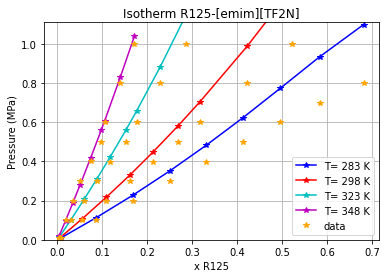

In [19]:
P1= np.zeros((len(P)))

for i in range(len(P)):
    P1[i] = P[i]/1e6

plt.plot(R125_x[0:9],P1[0:9],"b*-",label="T= 283 K")  
plt.plot(R125_x[9:18],P1[9:18],"r*-",label="T= 298 K") 
plt.plot(R125_x[18:27],P1[18:27],"c*-",label="T= 323 K") 
plt.plot(R125_x[27:],P1[27:],"m-*",label="T= 348 K")
plt.plot(data_full["x_R125"],data_full["pressure"]/1e6,"*",color='orange',label="data")  
plt.title('Isotherm R125-[emim][TF2N]')
plt.ylabel('Pressure (MPa)')
plt.xlabel('x R125')
plt.grid(True)
plt.ylim(0,1.110000)
plt.legend()
plt.show()

### Print Eigvals, Eigvectors of Covariance

An identifiability analysis can be performed with these as well as a FIM because the covariance matrix is the inverse of the FIM. That means that if there are any eigvals >> 0, their eigvecs indicate directions of un-identifiability.

In [20]:
eigvals, eigvecs = np.linalg.eig(cov)

In [21]:
eigvals

array([4.12330982e-07])

In [22]:
eigvecs

array([[1.]])

In [23]:
np.savetxt('Data/EigenAnalysis/PR_vals_1parameter_HFCILfit.csv',eigvals,delimiter=',')
np.savetxt('Data/EigenAnalysis/PR_vecs_1parameter_HFCILfit.csv',eigvecs,delimiter=',')

Conclusion: Fully identifiable because all eigvals ~ 0 

## FIM with Enthalpy of Vaporization (and Pressure)

### Step 1: Perturb Parameters, Calculate Enthalpy of Vaporization

1. Perturb Parameters: stepsize = 0.001

2. Holding all other parameters constant, calculate new pressure predictions at different temps, compositions 

*T = (T1=298, T2=323)

*x = (0.01,0.2,0.325,0.4)

*Pguess comes from data_full

3. Save P, Use Clausius Clapeyron to calculate enthvap

In [ ]:
h = 0.001
kR32_emimTF2N_plus = parameters['fs.properties.PR_kappa_A[R32,emimTf2N]'] + h
kR32_emimTF2N_minus = parameters['fs.properties.PR_kappa_A[R32,emimTf2N]'] - h
kemimTF2N_R32_plus = parameters['fs.properties.PR_kappa_A[emimTf2N,R32]'] + h
kemimTF2N_R32_minus = parameters['fs.properties.PR_kappa_A[emimTf2N,R32]'] - h

In [ ]:
data = np.array([[kR32_emimTF2N_plus,parameters['fs.properties.PR_kappa_A[emimTf2N,R32]']],
                [kR32_emimTF2N_minus,parameters['fs.properties.PR_kappa_A[emimTf2N,R32]']],
                [parameters['fs.properties.PR_kappa_A[R32,emimTf2N]'],kemimTF2N_R32_plus],
               [parameters['fs.properties.PR_kappa_A[R32,emimTf2N]'],kemimTF2N_R32_minus]])

In [ ]:
perturbed_params = pd.DataFrame(data=data,columns=['kR32_emimTF2N','kemimTF2N_R32'])
perturbed_params

In [ ]:
x = [0.01,0.2,0.325,0.4]
temps_298 = [298.15,298.15,298.15,298.15]
pguess_298 = [9600,250000,399400,549000]
temps_323 = [323.15,323.15,323.15,323.15]
pguess_323 = [20400,400100,700300,1000000]

In [ ]:
test_298 = pd.DataFrame()
test_298['temperature'] = temps_298
test_298['pressure'] = pguess_298
test_298['x_R32'] = x
test_298['x_emimTf2N'] = 1-test_298['x_R32']
# test_298

In [ ]:
test_323 = pd.DataFrame()
test_323['temperature'] = temps_323
test_323['pressure'] = pguess_323
test_323['x_R32'] = x
test_323['x_emimTf2N'] = 1-test_323['x_R32']
# test_323

In [ ]:
test_data = pd.concat([test_298,test_323],ignore_index=True)

In [ ]:
# Loop through test values

R32_x = np.zeros((len(perturbed_params),len(test_data)))
P = np.zeros((len(perturbed_params),len(test_data)))

for j in range(len(perturbed_params)):

    m = ConcreteModel()

    m.fs = FlowsheetBlock(default={"dynamic": False})

    m.fs.properties = GenericParameterBlock(default=configuration)

    m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                               "has_heat_transfer": True,
                               "has_pressure_change": True})

    m.fs.F101.inlet.flow_mol.fix(1)
    m.fs.F101.inlet.temperature.fix(323.15)
    m.fs.F101.inlet.pressure.fix(399800)
    m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.5)

    m.fs.properties.PR_kappa_A['R32','emimTf2N'] = perturbed_params['kR32_emimTF2N'][j]
    m.fs.properties.PR_kappa_A['emimTf2N','R32'] = perturbed_params['kemimTF2N_R32'][j]

    # Initialize the flash unit
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

    # Fix the state variables on the state block
    # m.fs.F101.inlet.pressure.unfix()
    m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].unfix()

    m.fs.liq = Param(mutable=True,default=0.040)
    m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "emimTf2N"] == m.fs.liq)

    for i in range(len(test_data)):
        m.fs.liq = test_data["x_emimTf2N"].iloc[i]
        m.fs.F101.inlet.temperature.fix(float(test_data["temperature"].iloc[i]))
        m.fs.F101.inlet.pressure.fix(float(test_data["pressure"].iloc[i]))
        m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(test_data["x_R32"].iloc[i])+0.1)
        m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(float(1-(test_data["x_R32"].iloc[i]+0.1)))
        m.fs.F101.vap_outlet.temperature.fix(float(test_data["temperature"].iloc[i]))

    #     DOF_final = degrees_of_freedom(m)
    #     print("The final DOF is {0}".format(DOF_final))
        m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

        status = solver.solve(m, tee = False)

    #     m.fs.F101.report()
        if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):
            print(test_data["x_emimTf2N"].iloc[i])
            R32_x[j,i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32'])
            P[j,i] = value(m.fs.F101.vap_outlet.pressure[0])

        else:
            print('Infeasible.')

In [ ]:
test_data['P_kR32_emimTF2N_plus'] = P[0]
test_data['P_kR32_emimTF2N_minus'] = P[1]
test_data['P_kemimTF2N_R32_plus'] = P[2]
test_data['P_kemimTF2N_R32_minus'] = P[3]

In [ ]:
grad_P = test_data

In [ ]:
test_data_298 = test_data[test_data['temperature']==298.15]
test_data_323 = test_data[test_data['temperature']==323.15].reset_index()

In [ ]:
R = 8.314 #J/mol-K
hvap_calc_kR32_emimTF2N_plus = []
for i in range(len(x)):
    T2 = test_data_323['temperature'][i]
    T1 = test_data_298['temperature'][i]
    P2 = test_data_323['P_kR32_emimTF2N_plus'][i]
    P1 = test_data_298['P_kR32_emimTF2N_plus'][i]
    hvap_calc_kR32_emimTF2N_plus.append(np.log(P2/P1)*R/(1/T2-1/T1))

hvap_calc_kR32_emimTF2N_minus = []
for i in range(len(x)):
    T2 = test_data_323['temperature'][i]
    T1 = test_data_298['temperature'][i]
    P2 = test_data_323['P_kR32_emimTF2N_minus'][i]
    P1 = test_data_298['P_kR32_emimTF2N_minus'][i]
    hvap_calc_kR32_emimTF2N_minus.append(np.log(P2/P1)*R/(1/T2-1/T1))
    
hvap_calc_kemimTF2N_R32_plus = []
for i in range(len(x)):
    T2 = test_data_323['temperature'][i]
    T1 = test_data_298['temperature'][i]
    P2 = test_data_323['P_kemimTF2N_R32_plus'][i]
    P1 = test_data_298['P_kemimTF2N_R32_plus'][i]
    hvap_calc_kemimTF2N_R32_plus.append(np.log(P2/P1)*R/(1/T2-1/T1))
    
hvap_calc_kemimTF2N_R32_minus = []
for i in range(len(x)):
    T2 = test_data_323['temperature'][i]
    T1 = test_data_298['temperature'][i]
    P2 = test_data_323['P_kemimTF2N_R32_minus'][i]
    P1 = test_data_298['P_kemimTF2N_R32_minus'][i]
    hvap_calc_kemimTF2N_R32_minus.append(np.log(P2/P1)*R/(1/T2-1/T1))

In [ ]:
hvap = pd.DataFrame()
hvap['x_R32'] = x
hvap['hvap_kR32_emimTF2N_plus'] = hvap_calc_kR32_emimTF2N_plus
hvap['hvap_kR32_emimTF2N_minus'] = hvap_calc_kR32_emimTF2N_minus
hvap['hvap_kemimTF2N_R32_plus'] = hvap_calc_kemimTF2N_R32_plus
hvap['hvap_kemimTF2N_R32_minus'] = hvap_calc_kemimTF2N_R32_minus

In [ ]:
hvap

### Step 2: Calculate Gradient wrt each param at each concentration

In [ ]:
grad_kR32_emimTF2N = (hvap['hvap_kR32_emimTF2N_plus'] - hvap['hvap_kR32_emimTF2N_minus'])/(2*h)
grad_kemimTF2N_R32 = (hvap['hvap_kemimTF2N_R32_plus'] - hvap['hvap_kemimTF2N_R32_minus'])/(2*h)

In [ ]:
grad_P['kR32_emimTF2N'] = (grad_P['P_kR32_emimTF2N_plus'] - grad_P['P_kR32_emimTF2N_minus'])/(2*h)
grad_P['kemimTF2N_R32'] = (grad_P['P_kemimTF2N_R32_plus'] - grad_P['P_kemimTF2N_R32_minus'])/(2*h)

### Step 3: Build Jacobian and FIM

Rows: enthvap @ 4 concentrations; or pressure @ 4 concentrations, 2 temperatures

Columns: parameters (2)

In [ ]:
J_df = pd.DataFrame()
J_df['kR32_emimTF2N'] = grad_kR32_emimTF2N
J_df['kemimTF2N_R32'] = grad_kemimTF2N_R32

In [ ]:
J = J_df.to_numpy()
Jtrans = np.transpose(J)

In [ ]:
FIM = np.dot(Jtrans,J)

In [ ]:
FIM

In [ ]:
J_df_P = pd.DataFrame()
J_df_P['kR32_emimTF2N'] = grad_P['kR32_emimTF2N']
J_df_P['kemimTF2N_R32'] = grad_P['kemimTF2N_R32']

In [ ]:
J_P = J_df_P.to_numpy()
J_Ptrans = np.transpose(J_P)

In [ ]:
FIM_P = np.dot(J_Ptrans,J_P)

In [ ]:
FIM_P

### Step 4: Find Eigenvalues, Eigenvectors

**Enthalpy of Vaporization**

In [ ]:
eigvals, eigvecs = np.linalg.eig(FIM)

In [ ]:
eigvals

In [ ]:
eigvecs

All eigenvalues >> 0, assuming that these 2 parameters are identifiable with the given T, x, P data

**Pressure**

In [ ]:
eigvals_P, eigvecs_P = np.linalg.eig(FIM_P)

In [ ]:
eigvals_P

In [ ]:
eigvecs_P

All eigvals >> 0, assuming these 2 parameters are identifiable with the given T, x, P data

## AIC Value

See https://docs.google.com/document/d/1um0r2XK4ldjjy2colOqaZsEM3wIzGD6l_3B8gnpnI2I/edit# for equations

In [24]:
n = 1

In [25]:
SSR = obj_value
SSR

0.2950910597755095

In [26]:
sigma_sq = SSR/n
sigma_sq

0.2950910597755095

In [27]:
L = -n/2*np.log(2*np.pi) - n/2*np.log(sigma_sq) - 1/(2*sigma_sq)*SSR
L

-0.808702886670569

In [28]:
AIC = 2*n - 2*L
AIC

3.617405773341138

In [29]:
AIC_data = pd.DataFrame(data=[n,obj_value,AIC])
AIC_data = AIC_data.T
AIC_data.columns = ['n','Objective, Pa^2','AIC']
AIC_data.to_csv('Data/AIC/PR_AIC_1parameter_HFCILfit.csv')